Stampa tutte le colonne del file StatisticheGiocatori.csv


In [2]:
import pandas as pd

# Carica il file CSV
df = pd.read_csv("StatisticheGiocatori.csv")

# Stampa l'elenco completo delle colonne
print("Elenco delle colonne presenti nel dataset:")
print(df.columns.tolist())


Elenco delle colonne presenti nel dataset:
['Player', 'Team', 'Position', 'Possessions Won in Final 3rd per 90', 'Possessions Won Midfield per 90', 'Tackles per 90', 'Tackle Success Rate (%)', 'Chances Created', 'Chances Created per 90', 'Accurate Long Balls per 90', 'Successful Long Balls (%)', 'Minutes', 'Matches', 'Big Chances Missed', 'Clearances per 90', 'Total Clearances', 'Expected Goals (xG)', 'Actual Goals', 'Fouls Committed per 90', 'Interceptions per 90', 'Total Interceptions', 'Penalties Conceded', 'Clean Sheets', 'Goals Conceded', 'Expected Assists (xA)', 'Actual Assists', 'Expected Goals on Target (xGOT)', 'Goals Conceded per 90', 'Shots on Target per 90', 'Shot Accuracy (%)', 'Penalties Won', 'Fouls Won per 90', 'Red Cards', 'Secondary Assists', 'Shots per 90', 'Shot Conversion Rate (%)', 'Accurate Passes per 90', 'Pass Success (%)', 'Penalties', 'Yellow Cards', 'Successful Dribbles per 90', 'Dribble Success Rate (%)', 'Expected Assists per 90', 'Actual Assists per 90', 

DIFENSORI

Cluster proposti:

* Centrale difensivo
* Terzino offensivo
* Colpitore di testa / Specialista aereo

| Colonna CSV                                | Interpretazione tattica                           |
| ------------------------------------------ | ------------------------------------------------- |
| `Tackles per 90`                           | Indica intensità difensiva (utile per tutti)      |
| `Tackle Success Rate (%)`                  | Qualità nei contrasti                             |
| `Interceptions per 90`                     | Lettura del gioco, utile per centrali e difensivi |
| `Clearances per 90`                        | Espulsione del pericolo (centrali)                |
| `Blocks per 90`                            | Tipico di centrali o colpitore di testa           |
| `Actual Goals`                             | Può emergere nei difensori goleador               |
| `Shots per 90`                             | Indizio offensivo nei terzini o colpitori         |
| `Successful Dribbles per 90`               | Alto = terzino offensivo                          |
| `Actual Assists` / `Expected Assists (xA)` | Terzini creativi                                  |
| `Pass Success (%)`                         | Indicatore di affidabilità, più per centrali      |
| `Fouls Committed per 90`                   | Da valutare come indicatore di aggressività       |
| `Minutes`                                  | Possibile filtro iniziale (>500 min)              |


CENTROCAMPISTI

Cluster proposti:
* Regista
* Box-to-Box
* Centrocampista difensivo
* Centrocampista prolifico

| Colonna CSV                  | Significato tattico                               |
| ---------------------------- | ------------------------------------------------- |
| `Assists`                    | Output creativo, utile per tutti tranne difensivo |
| `Expected Assists (xA)`      | Ancora più utile dei reali per regista / box      |
| `Shots per 90`               | Alto → prolifico                                  |
| `Actual Goals`               | Prolifico                                         |
| `Pass Success (%)`           | Alto nei registi                                  |
| `Accurate Passes per 90`     | Volume di gioco, regista e box-to-box             |
| `Successful Dribbles per 90` | Box-to-box o incursori                            |
| `Tackles per 90`             | Difensivo e box-to-box                            |
| `Interceptions per 90`       | Difensivo                                         |
| `Dribble Success Rate (%)`   | Valido per distinguere efficacia nei dribbling    |


ATTACCANTI

Cluster proposti:
* Finalizzatore
* Seconda punta
* Ala
* Attaccante di supporto

| Colonna CSV                  | Utile per…                              |
| ---------------------------- | --------------------------------------- |
| `Actual Goals`               | Finalizzatore, Seconda punta            |
| `Expected Goals (xG)`        | Finalizzatore, Supporto                 |
| `Shots per 90`               | Finalizzatore, Ala                      |
| `Shot Conversion Rate (%)`   | Finalizzatore                           |
| `Assists`                    | Seconda punta, Supporto                 |
| `Expected Assists (xA)`      | Supporto, Ala                           |
| `Pass Success (%)`           | Supporto (giocatori associativi)        |
| `Successful Dribbles per 90` | Ala                                     |
| `Fouls Won per 90`           | Ala o attaccanti che creano superiorità |
| `Chances Created`            | Supporto o Ala                          |
| `Shots on Target per 90`     | Finalizzatore o Ala                     |


In [3]:
# Colonne per il clustering dei Difensori
difensori_features = [
    'Tackles per 90',
    'Tackle Success Rate (%)',
    'Interceptions per 90',
    'Clearances per 90',
    'Blocks per 90',
    'Actual Goals',
    'Shots per 90',
    'Successful Dribbles per 90',
    'Actual Assists',
    'Pass Success (%)'
]

# Colonne per il clustering dei Centrocampisti
centrocampisti_features = [
    'Actual Assists',
    'Expected Assists (xA)',
    'Shots per 90',
    'Actual Goals',
    'Pass Success (%)',
    'Accurate Passes per 90',
    'Successful Dribbles per 90',
    'Dribble Success Rate (%)',
    'Tackles per 90',
    'Interceptions per 90'
]

# Colonne per il clustering degli Attaccanti
attaccanti_features = [
    'Actual Goals',
    'Expected Goals (xG)',
    'Shots per 90',
    'Shot Conversion Rate (%)',
    'Actual Assists',
    'Expected Assists (xA)',
    'Pass Success (%)',
    'Successful Dribbles per 90',
    'Fouls Won per 90',
    'Chances Created'
]


In [4]:
# Step 1: Filtra solo i difensori con almeno 500 minuti giocati
df_difensori = df[(df["Position"] == "D") & (df["Minutes"] >= 500)].copy()

# Step 2: Definisci le colonne informative e le feature per il clustering
info_cols = ['Player', 'Team', 'Position']
# Step 3: Estrai le informazioni e le feature numeriche
df_difensori_info = df_difensori[info_cols].copy()
X_difensori = df_difensori[difensori_features].fillna(0)

# Step 4: Unione per visualizzazione (opzionale, utile per esplorare)
df_difensori_vis = pd.concat([df_difensori_info, X_difensori], axis=1)

# Step 5: Mostra le  righe
display(df_difensori)


,Player,Team,Position,Possessions Won in Final 3rd per 90,Possessions Won Midfield per 90,Tackles per 90,Tackle Success Rate (%),Chances Created,Chances Created per 90,Accurate Long Balls per 90,...,Actual Assists per 90,Expected Goals per 90,Goals per 90,Blocks per 90,Total Blocks,FotMob Rating,Player of the Match Awards,Saves per 90,Total Saves,Country
79,adam masina,Torino,D,0.1,1.5,1.0,57.1,3.0,0.2,2.4,...,0.0,0.04,0.00,0.6,7.0,0.00,0.0,0.0,0.0,MAR
80,johan vasquez,Genoa,D,0.1,1.1,1.0,64.7,11.0,0.3,2.3,...,0.0,0.06,0.03,0.8,26.0,6.92,0.0,0.0,0.0,MEX
81,joao ferreira,Udinese,D,0.2,1.7,2.1,72.4,13.0,0.6,2.5,...,0.0,0.02,0.00,0.3,6.0,6.71,0.0,0.0,0.0,POR
82,alessio romagnoli,Lazio,D,0.0,0.0,0.7,72.0,6.0,0.2,1.8,...,0.0,0.04,0.00,0.6,17.0,6.92,0.0,0.0,0.0,ITA
83,victor kristiansen,Bologna,D,0.2,1.0,1.3,65.4,23.0,0.9,1.6,...,0.1,0.01,0.00,0.3,8.0,6.90,1.0,0.0,0.0,DEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,cristiano biraghi,Fiorentina,D,0.2,1.8,1.1,59.6,46.0,1.8,3.0,...,0.2,0.06,0.08,0.2,5.0,7.03,1.0,0.0,0.0,ITA
298,josh doig,Sassuolo,D,0.1,1.4,1.1,63.4,19.0,0.8,1.0,...,0.1,0.02,0.00,0.5,13.0,6.52,0.0,0.0,0.0,SCO
299,juan cabal,Verona,D,0.2,1.9,1.6,75.0,12.0,0.7,2.2,...,0.0,0.03,0.00,0.5,9.0,6.84,1.0,0.0,0.0,COL
300,juan jesus,Napoli,D,0.0,2.3,0.8,45.2,5.0,0.2,3.7,...,0.0,0.06,0.04,0.5,12.0,6.84,0.0,0.0,0.0,BRA


Fase 1 – Normalizzazione (StandardScaler)


Normalizziamo X_difensori con StandardScaler:

In [33]:
from sklearn.preprocessing import StandardScaler

# Inizializza lo scaler
scaler = StandardScaler()

# Applica lo scaling
X_difensori_scaled = scaler.fit_transform(X_difensori)

display(pd.DataFrame(X_difensori_scaled, columns=X_difensori.columns))



,Tackles per 90,Tackle Success Rate (%),Interceptions per 90,Clearances per 90,Blocks per 90,Actual Goals,Shots per 90,Successful Dribbles per 90,Actual Assists,Pass Success (%)
0,0.024952,-0.419606,0.336719,0.219369,0.241782,-0.739974,-0.315119,-0.787769,-0.879666,0.577145
1,0.024952,0.461058,1.046715,0.646305,0.895390,0.095043,1.129338,-0.333926,-0.235625,-0.873746
2,3.094076,1.353310,1.046715,0.987854,-0.738631,-0.739974,-1.278090,1.027605,-0.235625,-1.293281
3,-0.812082,1.306959,0.336719,1.244016,0.241782,-0.739974,-0.555861,-1.014691,-0.879666,1.433695
4,0.861986,0.542172,-1.083273,-1.061440,-0.738631,-0.739974,-1.037347,-0.107004,1.052457,0.489741
...,...,...,...,...,...,...,...,...,...,...
118,0.303964,-0.129914,-1.083273,-0.976052,-1.065435,0.930059,-0.074376,-0.560847,2.340539,-0.104599
119,0.303964,0.310418,-0.373277,-0.549116,-0.085022,-0.739974,-0.315119,0.346840,0.408416,-1.747777
120,1.699020,1.654589,1.520046,0.133982,-0.085022,-0.739974,0.166367,0.573762,-0.879666,-2.132351
121,-0.533070,-1.798540,0.100054,-0.036793,-0.085022,0.095043,-0.796604,-1.014691,-0.879666,1.311330



Metodo del gomito per determinare il numero ottimale di cluster k per i difensori.



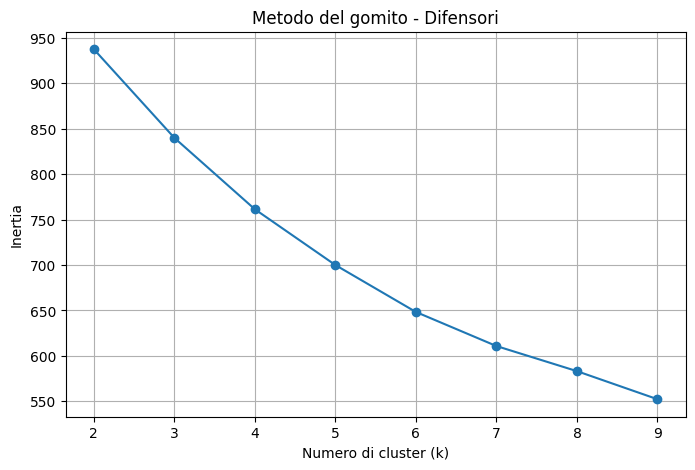

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista per salvare l'inerzia (somma delle distanze intra-cluster)
inertia = []
k_range = range(2, 10)  # testiamo k da 2 a 9

# Calcolo dell'inerzia per ogni k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_difensori_scaled)
    inertia.append(kmeans.inertia_)

# Tracciamo il grafico del gomito
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Metodo del gomito - Difensori')
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


Analisi del gomito

Nel grafico si nota che:
* Da k = 2 a k = 5 l’inerzia scende bruscamente
* Da k = 6 in poi, il miglioramento è più graduale
* Il “gomito” visivo è tra 4 e 5, che è proprio il punto dove la curva inizia ad appiattirsi

Anche se in origine avevamo ipotizzato 3 cluster (Centrale, Terzino, Colpitore), il dataset sembra più ricco di variazioni di quanto previsto → 5 cluster potrebbero rifinire meglio le sfumature.
K = 5

In [7]:
from sklearn.cluster import KMeans
# Applica il clustering con k = 5
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_difensori_scaled)

# Aggiungi la colonna 'Cluster' al DataFrame informativo
df_difensori_info['Cluster'] = clusters

# Unisci info + features + cluster per analisi completa
df_difensori_clustered = pd.concat([df_difensori_info, X_difensori], axis=1)

# Visualizza le righe con cluster assegnati
display(df_difensori_clustered)

,Player,Team,Position,Cluster,Tackles per 90,Tackle Success Rate (%),Interceptions per 90,Clearances per 90,Blocks per 90,Actual Goals,Shots per 90,Successful Dribbles per 90,Actual Assists,Pass Success (%)
79,adam masina,Torino,D,4,1.0,57.1,1.1,2.9,0.6,0.0,0.5,0.1,0.0,86.6
80,johan vasquez,Genoa,D,4,1.0,64.7,1.4,3.4,0.8,1.0,1.1,0.3,1.0,78.3
81,joao ferreira,Udinese,D,2,2.1,72.4,1.4,3.8,0.3,0.0,0.1,0.9,1.0,75.9
82,alessio romagnoli,Lazio,D,4,0.7,72.0,1.1,4.1,0.6,0.0,0.4,0.0,0.0,91.5
83,victor kristiansen,Bologna,D,3,1.3,65.4,0.5,1.4,0.3,0.0,0.2,0.4,3.0,86.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,cristiano biraghi,Fiorentina,D,0,1.1,59.6,0.5,1.5,0.2,2.0,0.6,0.2,5.0,82.7
298,josh doig,Sassuolo,D,3,1.1,63.4,0.8,2.0,0.5,0.0,0.5,0.6,2.0,73.3
299,juan cabal,Verona,D,2,1.6,75.0,1.6,2.8,0.5,0.0,0.7,0.7,0.0,71.1
300,juan jesus,Napoli,D,1,0.8,45.2,1.0,2.6,0.5,1.0,0.3,0.0,0.0,90.8


Calcolo delle medie delle feature per ciascun cluster, così possiamo analizzare i profili tattici.

In [8]:
# Raggruppa per cluster e calcola la media delle feature numeriche
cluster_means = df_difensori_clustered.groupby("Cluster")[difensori_features].mean().round(2)

# Visualizza il risultato
cluster_means


,Tackles per 90,Tackle Success Rate (%),Interceptions per 90,Clearances per 90,Blocks per 90,Actual Goals,Shots per 90,Successful Dribbles per 90,Actual Assists,Pass Success (%)
Cluster,,,,,,,,,,
0,1.04,63.51,0.75,1.76,0.34,2.41,1.14,0.58,3.53,85.55
1,0.67,51.92,0.82,3.06,0.76,1.08,0.44,0.15,0.67,88.20
2,1.46,67.30,1.09,2.12,0.26,0.40,1.05,1.30,0.50,73.15
3,1.01,60.63,0.73,1.75,0.28,0.46,0.53,0.63,1.89,80.44
4,1.04,63.45,1.32,3.76,0.76,0.59,0.51,0.17,0.57,84.53


,Player,Team,Position,Cluster,Tackles per 90,Tackle Success Rate (%),Interceptions per 90,Clearances per 90,Blocks per 90,Actual Goals,Shots per 90,Successful Dribbles per 90,Actual Assists,Pass Success (%),Etichetta_Tattica
79,adam masina,Torino,D,4,1.0,57.1,1.1,2.9,0.6,0.0,0.5,0.1,0.0,86.6,Leader difensivo
80,johan vasquez,Genoa,D,4,1.0,64.7,1.4,3.4,0.8,1.0,1.1,0.3,1.0,78.3,Leader difensivo
81,joao ferreira,Udinese,D,2,2.1,72.4,1.4,3.8,0.3,0.0,0.1,0.9,1.0,75.9,Stopper
82,alessio romagnoli,Lazio,D,4,0.7,72.0,1.1,4.1,0.6,0.0,0.4,0.0,0.0,91.5,Leader difensivo
83,victor kristiansen,Bologna,D,3,1.3,65.4,0.5,1.4,0.3,0.0,0.2,0.4,3.0,86.1,Libero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,cristiano biraghi,Fiorentina,D,0,1.1,59.6,0.5,1.5,0.2,2.0,0.6,0.2,5.0,82.7,Terzino offensivo
298,josh doig,Sassuolo,D,3,1.1,63.4,0.8,2.0,0.5,0.0,0.5,0.6,2.0,73.3,Libero
299,juan cabal,Verona,D,2,1.6,75.0,1.6,2.8,0.5,0.0,0.7,0.7,0.0,71.1,Stopper
300,juan jesus,Napoli,D,1,0.8,45.2,1.0,2.6,0.5,1.0,0.3,0.0,0.0,90.8,Regista difensivo


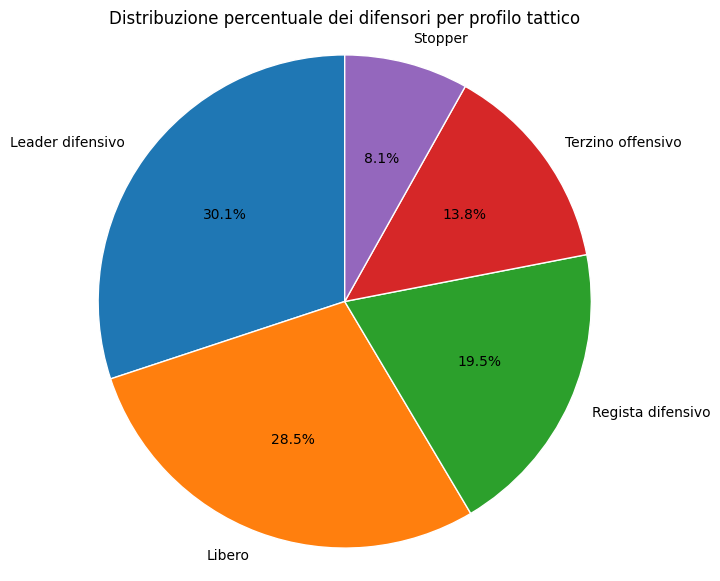

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import matplotlib.pyplot as plt

# Mappa dei nomi tattici per ciascun cluster
etichetta_cluster_difensori = {
    0: "Terzino offensivo",
    1: "Regista difensivo",
    2: "Stopper",
    3: "Libero",
    4: "Leader difensivo"
}

# Aggiunta della colonna Etichetta_Tattica
df_difensori_clustered["Etichetta_Tattica"] = df_difensori_clustered["Cluster"].map(etichetta_cluster_difensori)

# Visualizza anteprima
display(df_difensori_clustered)

# Conta i giocatori per etichetta tattica
conteggio_cluster = df_difensori_clustered["Etichetta_Tattica"].value_counts()

# Crea il grafico a torta
plt.figure(figsize=(7, 7))
plt.pie(
    conteggio_cluster,
    labels=conteggio_cluster.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Distribuzione percentuale dei difensori per profilo tattico")
plt.axis('equal')  # per mantenere il cerchio proporzionato
plt.show()

# Salva il CSV
df_difensori_clustered[['Player', 'Team', 'Position', 'Etichetta_Tattica']].to_csv("Clustering_Difensori.csv", index=False)
from google.colab import files
files.download("Clustering_Difensori.csv")


Ora per i centrocampisti

In [10]:
# Filtra solo i centrocampisti con almeno 500 minuti giocati
df_centrocampisti = df[(df["Position"] == "C") & (df["Minutes"] >= 500)].copy()

# Colonne informative
info_cols = ['Player', 'Team', 'Position']
df_centrocampisti_info = df_centrocampisti[info_cols].copy()

# Selezione e pulizia delle feature
X_centrocampisti = df_centrocampisti[centrocampisti_features].fillna(0)

# Unione informativa (solo per visualizzazione, non per clustering)
df_centrocampisti_vis = pd.concat([df_centrocampisti_info, X_centrocampisti], axis=1)

# Visualizza le prime righe
df_centrocampisti_vis.head()


,Player,Team,Position,Actual Assists,Expected Assists (xA),Shots per 90,Actual Goals,Pass Success (%),Accurate Passes per 90,Successful Dribbles per 90,Dribble Success Rate (%),Tackles per 90,Interceptions per 90
309,adrien tameze,Torino,C,2.0,1.2,0.4,0.0,87.9,45.6,0.5,70.6,0.7,2.0
310,adrien rabiot,Juventus,C,3.0,4.0,1.3,5.0,84.4,32.6,1.0,57.1,1.3,0.8
311,alfred duncan,Fiorentina,C,5.0,2.8,1.1,2.0,81.1,36.8,1.0,55.6,1.0,0.5
312,alexis blin,Lecce,C,2.0,0.7,0.7,0.0,87.5,36.5,0.3,50.0,1.0,1.2
313,warren bondo,Monza,C,1.0,0.2,1.0,1.0,90.2,33.8,0.8,76.5,1.3,0.4


In [11]:
from sklearn.preprocessing import StandardScaler

# Inizializza lo scaler
scaler = StandardScaler()

# Applica lo scaling ai dati dei centrocampisti
X_centrocampisti_scaled = scaler.fit_transform(X_centrocampisti)


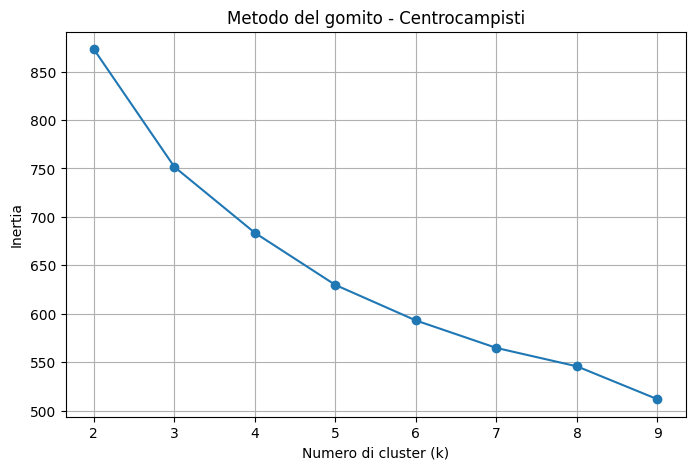

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista per salvare l'inerzia per ogni valore di k
inertia = []
k_range = range(2, 10)  # Testiamo k da 2 a 9

# Calcolo dell'inerzia per ogni numero di cluster
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_centrocampisti_scaled)
    inertia.append(kmeans.inertia_)

# Tracciamo il grafico
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Metodo del gomito - Centrocampisti')
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [13]:
from sklearn.cluster import KMeans
# Applica il clustering con k = 5
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_centrocampisti_scaled)

# Aggiungi la colonna 'Cluster' al DataFrame informativo
df_centrocampisti_info['Cluster'] = clusters

# Unisci info + features + cluster per analisi completa
df_centrocampisti_clustered = pd.concat([df_centrocampisti_info, X_centrocampisti], axis=1)

# Visualizza anteprima
df_centrocampisti_clustered.head()


,Player,Team,Position,Cluster,Actual Assists,Expected Assists (xA),Shots per 90,Actual Goals,Pass Success (%),Accurate Passes per 90,Successful Dribbles per 90,Dribble Success Rate (%),Tackles per 90,Interceptions per 90
309,adrien tameze,Torino,C,2,2.0,1.2,0.4,0.0,87.9,45.6,0.5,70.6,0.7,2.0
310,adrien rabiot,Juventus,C,3,3.0,4.0,1.3,5.0,84.4,32.6,1.0,57.1,1.3,0.8
311,alfred duncan,Fiorentina,C,3,5.0,2.8,1.1,2.0,81.1,36.8,1.0,55.6,1.0,0.5
312,alexis blin,Lecce,C,0,2.0,0.7,0.7,0.0,87.5,36.5,0.3,50.0,1.0,1.2
313,warren bondo,Monza,C,2,1.0,0.2,1.0,1.0,90.2,33.8,0.8,76.5,1.3,0.4


In [14]:
# Calcola la media delle feature per ogni cluster
cluster_means_c = df_centrocampisti_clustered.groupby("Cluster")[centrocampisti_features].mean().round(2)

# Visualizza le medie
cluster_means_c


,Actual Assists,Expected Assists (xA),Shots per 90,Actual Goals,Pass Success (%),Accurate Passes per 90,Successful Dribbles per 90,Dribble Success Rate (%),Tackles per 90,Interceptions per 90
Cluster,,,,,,,,,,
0,1.47,1.28,0.84,0.90,83.79,35.50,0.53,49.92,1.20,0.99
1,1.83,1.70,1.88,3.42,77.80,25.10,0.71,47.53,0.73,0.46
2,1.76,1.39,0.90,1.48,88.90,51.71,0.63,67.52,1.16,0.95
3,4.24,4.14,1.64,5.05,84.52,40.18,0.81,51.02,0.86,0.59
4,1.60,1.44,1.61,1.47,78.32,24.53,1.57,56.24,1.43,0.66


,Player,Team,Position,Cluster,Actual Assists,Expected Assists (xA),Shots per 90,Actual Goals,Pass Success (%),Accurate Passes per 90,Successful Dribbles per 90,Dribble Success Rate (%),Tackles per 90,Interceptions per 90,Etichetta_Tattica
309,adrien tameze,Torino,C,2,2.0,1.2,0.4,0.0,87.9,45.6,0.5,70.6,0.7,2.0,Centrale equilibrato
310,adrien rabiot,Juventus,C,3,3.0,4.0,1.3,5.0,84.4,32.6,1.0,57.1,1.3,0.8,Trequartista
311,alfred duncan,Fiorentina,C,3,5.0,2.8,1.1,2.0,81.1,36.8,1.0,55.6,1.0,0.5,Trequartista
312,alexis blin,Lecce,C,0,2.0,0.7,0.7,0.0,87.5,36.5,0.3,50.0,1.0,1.2,Regista
313,warren bondo,Monza,C,2,1.0,0.2,1.0,1.0,90.2,33.8,0.8,76.5,1.3,0.4,Centrale equilibrato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,yacine adli,AC Milan,C,2,2.0,2.0,0.3,1.0,88.8,70.2,1.4,73.3,1.1,1.3,Centrale equilibrato
506,weston mckennie,Juventus,C,3,7.0,3.2,0.8,0.0,80.8,26.3,0.6,38.3,1.0,0.6,Trequartista
507,alberto grassi,Empoli,C,0,1.0,1.3,1.1,0.0,81.6,34.2,0.2,55.6,0.9,2.0,Regista
510,valentin carboni,Monza,C,4,3.0,1.4,1.8,2.0,85.2,33.6,1.9,57.1,1.2,0.5,Box-to-Box


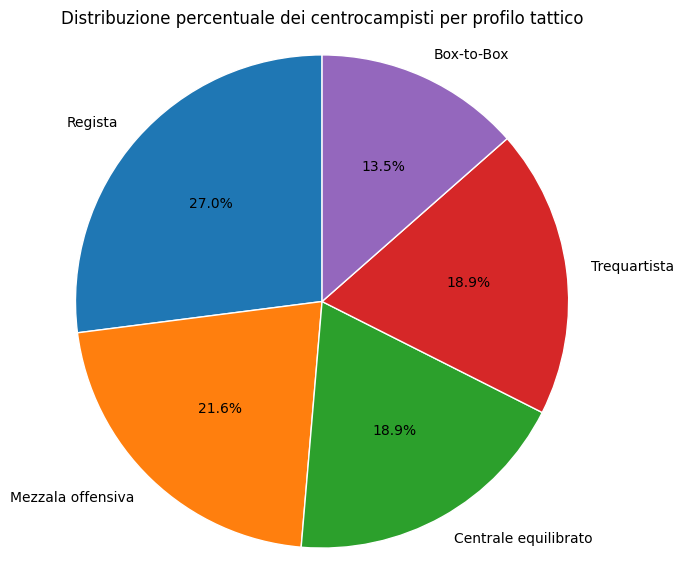

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
import matplotlib.pyplot as plt

# Mappa cluster → etichetta
etichetta_cluster_centrocampisti = {
    0: "Regista",
    1: "Mezzala offensiva",
    2: "Centrale equilibrato",
    3: "Trequartista",
    4: "Box-to-Box"
}

# Aggiunta della colonna Etichetta_Tattica
df_centrocampisti_clustered["Etichetta_Tattica"] = df_centrocampisti_clustered["Cluster"].map(etichetta_cluster_centrocampisti)

# Visualizza le prime righe per conferma
display(df_centrocampisti_clustered)

# Conta i giocatori per etichetta tattica
conteggio_cluster = df_centrocampisti_clustered["Etichetta_Tattica"].value_counts()

# Crea il grafico a torta
plt.figure(figsize=(7, 7))
plt.pie(
    conteggio_cluster,
    labels=conteggio_cluster.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Distribuzione percentuale dei centrocampisti per profilo tattico")
plt.axis('equal')  # per mantenere il cerchio proporzionato
plt.show()


# Salva il DataFrame completo in un file CSV
df_centrocampisti_clustered[['Player', 'Team', 'Position', 'Etichetta_Tattica']].to_csv("Clustering_Centrocampisti.csv", index=False)

from google.colab import files
files.download("Clustering_Centrocampisti.csv")



Ora per gli attaccanti

In [16]:
# Filtra solo gli attaccanti con almeno 500 minuti giocati
df_attaccanti = df[(df["Position"] == "A") & (df["Minutes"] >= 500)].copy()

# Colonne informative
info_cols = ['Player', 'Team', 'Position']
df_attaccanti_info = df_attaccanti[info_cols].copy()

# Selezione e pulizia delle feature
X_attaccanti = df_attaccanti[attaccanti_features].fillna(0)

# Unione informativa per visualizzazione
df_attaccanti_vis = pd.concat([df_attaccanti_info, X_attaccanti], axis=1)

# Visualizza le prime righe
df_attaccanti_vis.head()


,Player,Team,Position,Actual Goals,Expected Goals (xG),Shots per 90,Shot Conversion Rate (%),Actual Assists,Expected Assists (xA),Pass Success (%),Successful Dribbles per 90,Fouls Won per 90,Chances Created
516,valentin castellanos,Lazio,A,4.0,7.3,2.9,7.4,3.0,1.1,62.3,0.6,0.0,19.0
518,albert gudmundsson,Genoa,A,14.0,9.9,1.7,24.6,4.0,6.5,81.6,1.3,1.4,81.0
524,andrea belotti,Fiorentina,A,6.0,6.1,2.7,12.5,2.0,1.5,70.7,0.4,2.6,13.0
527,tommaso baldanzi,Roma,A,2.0,3.0,2.1,6.9,0.0,1.5,85.3,1.1,0.0,17.0
529,stephan el shaarawy,Roma,A,3.0,2.5,2.1,7.5,4.0,1.8,83.7,1.1,0.0,20.0


In [17]:
from sklearn.preprocessing import StandardScaler

# Inizializza lo scaler
scaler = StandardScaler()

# Applica lo scaling ai dati degli attaccanti
X_attaccanti_scaled = scaler.fit_transform(X_attaccanti)


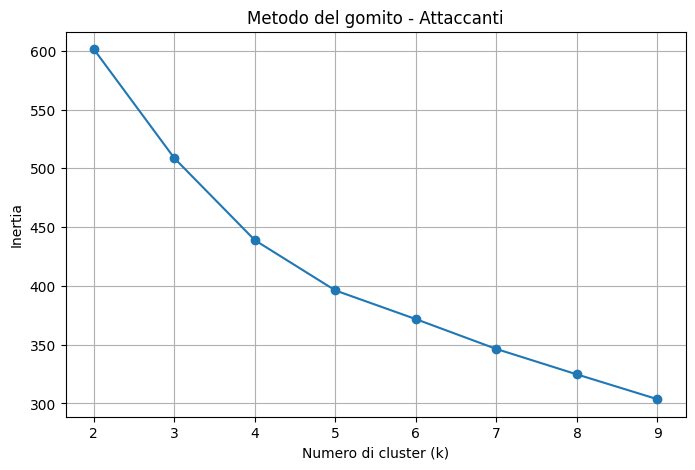

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcolo dell'inerzia per diversi valori di k
inertia = []
k_range = range(2, 10)  # Proviamo da 2 a 9 cluster

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_attaccanti_scaled)
    inertia.append(kmeans.inertia_)

# Grafico del gomito
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Metodo del gomito - Attaccanti')
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [19]:
from sklearn.cluster import KMeans
# Applica KMeans con k = 5
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_attaccanti_scaled)

# Aggiungi la colonna 'Cluster' al DataFrame informativo
df_attaccanti_info['Cluster'] = clusters

# Unisci info + features + cluster
df_attaccanti_clustered = pd.concat([df_attaccanti_info, X_attaccanti], axis=1)

# Visualizza le prime righe
df_attaccanti_clustered.head()


,Player,Team,Position,Cluster,Actual Goals,Expected Goals (xG),Shots per 90,Shot Conversion Rate (%),Actual Assists,Expected Assists (xA),Pass Success (%),Successful Dribbles per 90,Fouls Won per 90,Chances Created
516,valentin castellanos,Lazio,A,3,4.0,7.3,2.9,7.4,3.0,1.1,62.3,0.6,0.0,19.0
518,albert gudmundsson,Genoa,A,4,14.0,9.9,1.7,24.6,4.0,6.5,81.6,1.3,1.4,81.0
524,andrea belotti,Fiorentina,A,3,6.0,6.1,2.7,12.5,2.0,1.5,70.7,0.4,2.6,13.0
527,tommaso baldanzi,Roma,A,1,2.0,3.0,2.1,6.9,0.0,1.5,85.3,1.1,0.0,17.0
529,stephan el shaarawy,Roma,A,1,3.0,2.5,2.1,7.5,4.0,1.8,83.7,1.1,0.0,20.0


In [20]:
# Calcola la media delle feature per ogni cluster
cluster_means_a = df_attaccanti_clustered.groupby("Cluster")[attaccanti_features].mean().round(2)

# Visualizza le medie
cluster_means_a


,Actual Goals,Expected Goals (xG),Shots per 90,Shot Conversion Rate (%),Actual Assists,Expected Assists (xA),Pass Success (%),Successful Dribbles per 90,Fouls Won per 90,Chances Created
Cluster,,,,,,,,,,
0,14.78,12.92,3.40,17.36,4.44,2.02,72.31,0.80,0.54,29.11
1,1.46,2.18,1.77,6.18,1.58,1.63,78.60,1.30,0.07,17.31
2,5.40,5.61,2.67,9.45,2.87,3.11,76.55,1.55,1.18,36.40
3,4.78,5.20,2.49,13.79,1.26,0.84,70.13,0.54,0.70,12.89
4,11.00,9.34,2.63,16.58,6.78,5.41,81.59,1.99,1.16,61.00


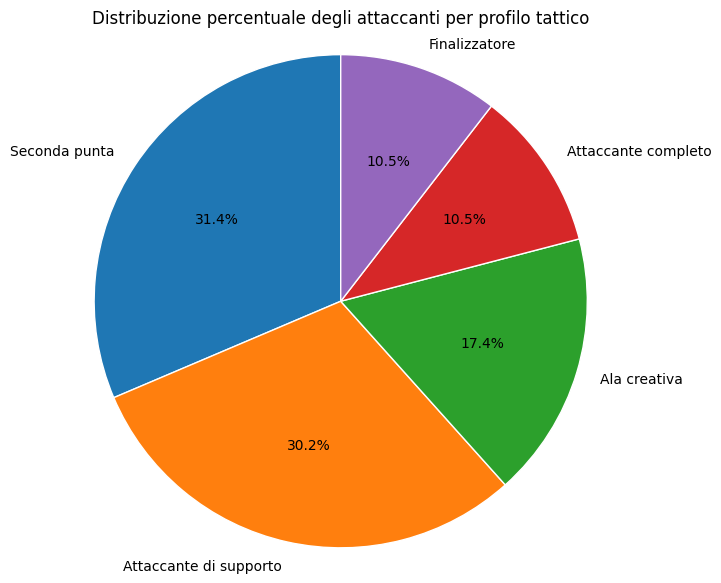

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
import matplotlib.pyplot as plt

# Mappa finale cluster → etichetta tattica
etichetta_cluster_attaccanti = {
    0: "Finalizzatore",
    1: "Attaccante di supporto",
    2: "Ala creativa",
    3: "Seconda punta",
    4: "Attaccante completo"
}

# Applica la mappa
df_attaccanti_clustered["Etichetta_Tattica"] = df_attaccanti_clustered["Cluster"].map(etichetta_cluster_attaccanti)

# Salva il CSV
df_attaccanti_clustered.to_csv("Attaccanti_Clusterizzati.csv", index=False)

# Conta i giocatori per etichetta tattica
conteggio_cluster = df_attaccanti_clustered["Etichetta_Tattica"].value_counts()

# Crea il grafico a torta
plt.figure(figsize=(7, 7))
plt.pie(
    conteggio_cluster,
    labels=conteggio_cluster.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Distribuzione percentuale degli attaccanti per profilo tattico")
plt.axis('equal')
plt.show()

# Download su Colab
from google.colab import files
files.download("Attaccanti_Clusterizzati.csv")


Proviamo a prendere in considerazione più feature

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Nuova lista di feature selezionate
attaccanti_features_plus = [
    'Actual Goals',
    'Expected Goals (xG)',
    'Shots per 90',
    'Shot Conversion Rate (%)',
    'Shot Accuracy (%)',
    'Big Chances Missed',
    'Actual Assists',
    'Expected Assists (xA)',
    'Pass Success (%)',
    'Successful Dribbles per 90',
    'Fouls Won per 90',
    'Chances Created',
    'Secondary Assists'
]

# Filtro attaccanti con almeno 500 minuti giocati
df_attaccanti = df[(df["Position"] == "A") & (df["Minutes"] >= 500)].copy()
df_attaccanti_info = df_attaccanti[['Player', 'Team', 'Position']].copy()
X_attaccanti = df_attaccanti[attaccanti_features_plus].fillna(0)

# Normalizzazione
scaler = StandardScaler()
X_attaccanti_scaled = scaler.fit_transform(X_attaccanti)

# Clustering con KMeans k = 5
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_attaccanti_scaled)

# Assegnazione cluster e costruzione DataFrame finale
df_attaccanti_info['Cluster'] = clusters
df_attaccanti_clustered_plus = pd.concat([df_attaccanti_info, X_attaccanti], axis=1)

# Calcolo medie per cluster
cluster_means_plus = df_attaccanti_clustered_plus.groupby("Cluster")[attaccanti_features_plus].mean().round(2)

# Visualizza risultati
display(cluster_means_plus)


,Actual Goals,Expected Goals (xG),Shots per 90,Shot Conversion Rate (%),Shot Accuracy (%),Big Chances Missed,Actual Assists,Expected Assists (xA),Pass Success (%),Successful Dribbles per 90,Fouls Won per 90,Chances Created,Secondary Assists
Cluster,,,,,,,,,,,,,
0,3.89,4.03,2.29,8.76,34.04,3.74,2.84,2.69,78.45,1.42,0.92,29.47,2.69
1,1.35,2.07,1.71,6.66,30.42,2.09,1.17,1.12,76.62,1.22,0.09,13.61,0.89
2,14.00,12.79,3.41,16.38,39.90,11.60,4.10,1.99,71.82,0.83,0.69,30.30,1.99
3,5.18,5.73,2.63,14.10,41.85,5.64,1.23,0.85,69.80,0.51,0.70,13.41,0.68
4,10.08,8.62,2.71,15.54,40.32,7.00,5.83,5.22,80.30,1.85,1.00,57.00,5.22


In [25]:
etichetta_cluster_attaccanti_k5_new = {
    0: "Seconda punta",
    1: "Attaccante di manovra",
    2: "Finalizzatore",
    3: "Prima punta",
    4: "Attaccante completo / Ala"
}


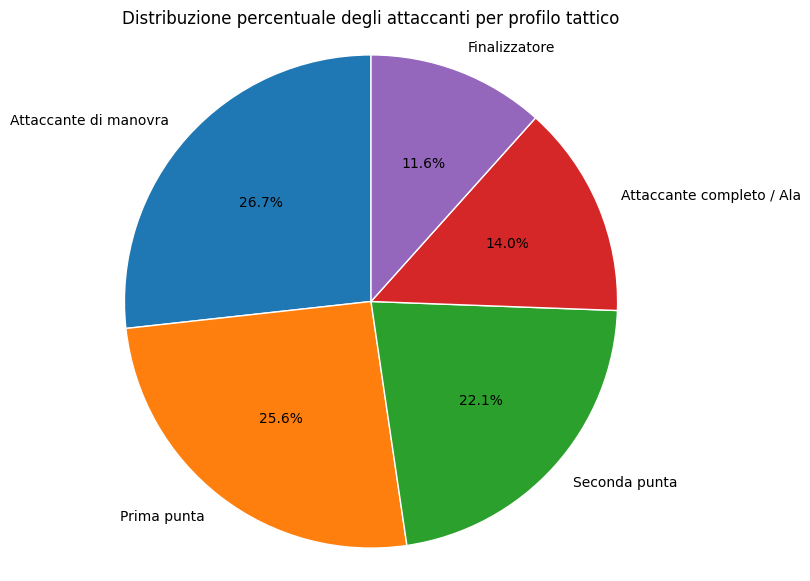

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
# Applica la nuova etichetta tattica
df_attaccanti_clustered_plus["Etichetta_Tattica"] = df_attaccanti_clustered_plus["Cluster"].map(etichetta_cluster_attaccanti_k5_new)

# Visualizza le prime righe per verifica
df_attaccanti_clustered_plus.head()

# Estrai solo le colonne desiderate
df_attaccanti_ridotto = df_attaccanti_clustered_plus[['Player', 'Team', 'Position', 'Etichetta_Tattica']]

# Salva il file ridotto
df_attaccanti_ridotto.to_csv("Clustering_Attaccanti.csv", index=False)

# 📊 Grafico a torta con percentuali
conteggio_cluster = df_attaccanti_ridotto["Etichetta_Tattica"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    conteggio_cluster,
    labels=conteggio_cluster.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Distribuzione percentuale degli attaccanti per profilo tattico")
plt.axis('equal')
plt.show()

# Download locale in Colab
from google.colab import files
files.download("Clustering_Attaccanti.csv")

In [29]:
# Carica i tre file
df_att = pd.read_csv("Clustering_Attaccanti.csv")
df_cent = pd.read_csv("Clustering_Centrocampisti.csv")
df_dif = pd.read_csv("Clustering_Difensori.csv")

# Unione verticale
df_unito = pd.concat([df_att, df_cent, df_dif], ignore_index=True)

# Salva il file finale
df_unito.to_csv("Giocatori_Di_Movimento_Clusterizzati.csv", index=False)

# Scarica
from google.colab import files
files.download("Giocatori_Di_Movimento_Clusterizzati.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# Carica il file finale
df = pd.read_csv("Giocatori_Di_Movimento_Clusterizzati.csv")

# Rinomina codici posizione
posizioni_legenda = {
    'D': 'difensori',
    'C': 'centrocampisti',
    'A': 'attaccanti'
}

df['Ruolo_Esteso'] = df['Position'].map(posizioni_legenda)

# Conta per Team e Ruolo
conteggio = df.groupby(['Team', 'Ruolo_Esteso']).size().unstack(fill_value=0)

# Stampa ogni squadra come richiesto
for team in conteggio.index:
    print(team)
    for ruolo in conteggio.columns:
        count = conteggio.loc[team, ruolo]
        print(f"{count} {ruolo}")
    print("-" * 30)


AC Milan
6 attaccanti
5 centrocampisti
7 difensori
------------------------------
Atalanta
4 attaccanti
5 centrocampisti
7 difensori
------------------------------
Bologna
4 attaccanti
6 centrocampisti
6 difensori
------------------------------
Cagliari
4 attaccanti
8 centrocampisti
5 difensori
------------------------------
Empoli
4 attaccanti
4 centrocampisti
6 difensori
------------------------------
Fiorentina
6 attaccanti
7 centrocampisti
6 difensori
------------------------------
Frosinone
5 attaccanti
5 centrocampisti
5 difensori
------------------------------
Genoa
3 attaccanti
5 centrocampisti
7 difensori
------------------------------
Inter
4 attaccanti
5 centrocampisti
8 difensori
------------------------------
Juventus
6 attaccanti
6 centrocampisti
4 difensori
------------------------------
Lazio
4 attaccanti
9 centrocampisti
7 difensori
------------------------------
Lecce
5 attaccanti
7 centrocampisti
5 difensori
------------------------------
Monza
4 attaccanti
6 centroc

Output finale pronto per la fase di Ricerca

In [32]:
# Carica i due file
df_pred = pd.read_csv("Etichette_Predette_G39_RandomForest.csv")
df_cluster = pd.read_csv("Giocatori_Di_Movimento_Clusterizzati.csv")

# Uniforma il nome della colonna chiave
df_pred = df_pred.rename(columns={"Giocatore": "Player"})

# Unione sul campo 'Player'
df_unito = pd.merge(df_pred, df_cluster[['Player', 'Etichetta_Tattica']], on='Player', how='left')

# Aggiusta i valori nella colonna Etichetta_Tattica:
# - Se Role == "P" → "Portiere"
# - Se Etichetta_Tattica è mancante → "N.C."
df_unito["Etichetta_Tattica"] = df_unito.apply(
    lambda row: "Portiere" if row["Role"] == "P" else ("N.C." if pd.isna(row["Etichetta_Tattica"]) else row["Etichetta_Tattica"]),
    axis=1
)

# Salva il risultato
df_unito.to_csv("Giocatori_Predetti_Con_Ruolo_Tattico.csv", index=False)

# Scarica in locale (Colab)
from google.colab import files
files.download("Giocatori_Predetti_Con_Ruolo_Tattico.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>